In [1]:
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn as skl
import tensorflow as tf
from sklearn.datasets import make_blobs

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

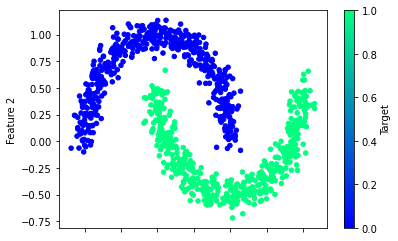

In [2]:
X_moons, y_moons = make_moons(n_samples=1000,noise=0.08, random_state=78)

#transforming y_moons to a vertical vetor
y_moons = y_moons.reshape(-1,1)

#create a df to plot the data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons['Target'] = y_moons

#plot the data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap = "winter")

In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons,y_moons, random_state=78)

#Create scaler instance
X_moons_caler = skl.preprocessing.StandardScaler()

#Fit the scaler
X_moons_caler.fit(X_moon_train)

#scale the data
X_moon_train_scaled = X_moons_caler.transform(X_moon_train)
X_moon_test_scaled = X_moons_caler.transform(X_moon_test)

In [5]:
#Train the model with nonlinear data
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn_model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

In [6]:
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train,epochs=100,shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 608us/step - loss: 0.7858 - accuracy: 0.3531
Epoch 2/100
24/24 [==============================] - 0s 609us/step - loss: 0.7749 - accuracy: 0.2492
Epoch 3/100
24/24 [==============================] - 0s 696us/step - loss: 0.7591 - accuracy: 0.2761
Epoch 4/100
24/24 [==============================] - 0s 696us/step - loss: 0.7499 - accuracy: 0.2701
Epoch 5/100
24/24 [==============================] - 0s 652us/step - loss: 0.7471 - accuracy: 0.2538
Epoch 6/100
24/24 [==============================] - 0s 652us/step - loss: 0.7366 - accuracy: 0.2659
Epoch 7/100
24/24 [==============================] - 0s 609us/step - loss: 0.7360 - accuracy: 0.3059
Epoch 8/100
24/24 [==============================] - 0s 652us/step - loss: 0.7265 - accuracy: 0.2823
Epoch 9/100
24/24 [==============================] - 0s 652us/step - loss: 0.7217 - accuracy: 0.3033
Epoch 10/100
24/24 [==============================] - 0s 696us/step - loss: 0.7154 - accura

24/24 [==============================] - 0s 609us/step - loss: 0.6934 - accuracy: 0.5132
Epoch 82/100
24/24 [==============================] - 0s 609us/step - loss: 0.6926 - accuracy: 0.5201
Epoch 83/100
24/24 [==============================] - 0s 609us/step - loss: 0.6891 - accuracy: 0.5484
Epoch 84/100
24/24 [==============================] - 0s 609us/step - loss: 0.6878 - accuracy: 0.5586
Epoch 85/100
24/24 [==============================] - 0s 609us/step - loss: 0.6910 - accuracy: 0.5332
Epoch 86/100
24/24 [==============================] - 0s 609us/step - loss: 0.6866 - accuracy: 0.5677
Epoch 87/100
24/24 [==============================] - 0s 652us/step - loss: 0.6922 - accuracy: 0.5238
Epoch 88/100
24/24 [==============================] - 0s 609us/step - loss: 0.6900 - accuracy: 0.5405
Epoch 89/100
24/24 [==============================] - 0s 609us/step - loss: 0.6943 - accuracy: 0.5061
Epoch 90/100
24/24 [==============================] - 0s 609us/step - loss: 0.6906 - accuracy: 

<AxesSubplot:>

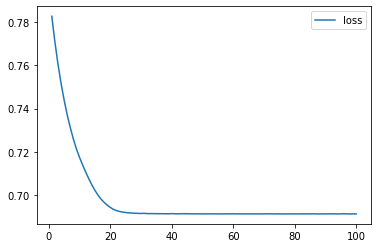

In [7]:
#create df with training data
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history['loss'])+1))

#plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

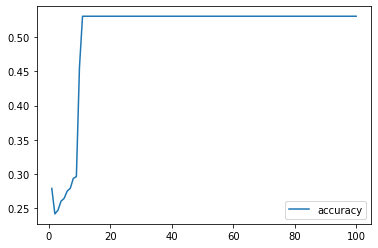

In [8]:
#plot the accuracy
history_df.plot(y="accuracy")